In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
sns.set_style('whitegrid')

In [3]:
os.chdir("/Users/sanyas/Desktop")

In [4]:
DatabaseDF = pd.read_csv("CleanedDataset.csv")

In [5]:
DatabaseDF.describe()

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
count,10856.000000,10848.000000,10688.000000,10856.000000,10856.000000,10856.000000,1.085600e+04,10839.000000,9306.000000,9200.000000,...,10856.000000,10856.000000,10847.000000,10856.000000,4556.000000,5180.000000,17.000000,5.000000,15.000000,10848.000000
mean,5427.500000,8914.655476,27.997754,152.173729,95.914886,18.198047,3.332069e+06,69222.382305,491.904380,394.693351,...,47.995412,-102.976506,596.784559,98.421863,27.581870,28.950772,25.470588,20.000000,70.600000,2012.425608
std,3134.001595,1833.823556,10.989723,4.829458,3.479933,10.444299,2.364422e+06,58068.128933,273.763722,217.153189,...,0.420657,0.451102,110.862786,54.173541,9.879565,10.537756,10.966527,9.027735,19.393666,2.208918
min,0.000000,3.000000,1.000000,139.000000,89.000000,1.000000,0.000000e+00,0.000000,1.873767,1.873767,...,46.804382,-104.044496,18.074815,0.280000,1.000000,1.000000,1.000000,15.000000,30.000000,2004.000000
25%,2713.750000,8916.000000,22.000000,149.000000,93.000000,9.000000,1.999804e+06,34778.000000,291.157133,238.242384,...,47.759769,-103.324524,578.587387,60.917500,22.000000,24.000000,19.000000,15.000000,55.500000,2011.000000
50%,5427.500000,9427.000000,30.000000,152.000000,96.000000,18.000000,2.958260e+06,55127.000000,454.043393,362.354810,...,47.993790,-102.928989,660.000000,88.970000,30.000000,30.000000,20.000000,16.000000,78.000000,2013.000000
75%,8141.250000,9799.000000,34.000000,155.000000,99.000000,27.000000,3.879750e+06,80064.000000,640.828402,506.618453,...,48.238771,-102.617006,660.000000,124.847500,34.000000,35.000000,37.000000,18.000000,85.000000,2014.000000
max,10855.000000,22231.000000,94.000000,164.000000,105.000000,36.000000,2.874457e+07,598562.000000,2264.727153,1819.044488,...,48.994837,-102.071631,660.000000,495.810000,80.000000,89.000000,37.000000,36.000000,94.000000,2017.000000


## Defintion

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.


Monte Carlo simulation can be used to tackle a range of problems in virtually every field such as finance, engineering, supply chain, and science.


Monte Carlo simulation is also referred to as multiple probability simulation. (Investopedia)

hey are used to estimate the probability of cost overruns in large projects and the likelihood that an asset price will move in a certain way

https://github.com/pat-hanbury/MonteCarloTutorial/blob/master/MonteCarloExample.ipynb

In [6]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

Functions are implemented with the Monte Carlo Function with 12 month cumulative production with max and min of production. 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [8]:
def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

In [9]:
def crude_monte_carlo(num_samples=10856):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    lower_bound = DatabaseDF['12 month Cum Prod'].min()
    upper_bound = DatabaseDF['12 month Cum Prod'].max()
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [10]:
def get_crude_MC_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = DatabaseDF['12 month Cum Prod'].max() # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

In [11]:
MC_samples = 10856
var_samples = 10856 # number of samples we will use to calculate the variance
crude_estimation = crude_monte_carlo(MC_samples)
variance = get_crude_MC_variance(var_samples)
error = math.sqrt(variance/MC_samples)

# display results
print(f"Monte Carlo Approximation of f(x): {crude_estimation}")
print(f"Error in Approximation: {error}")

Monte Carlo Approximation of f(x): 0.4549535435585609
Error in Approximation: 0.004658391673597069


In [34]:
# this is the template of our weight function g(x)
def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

In [35]:
def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

In [40]:
def get_IS_variance(lamda, num_samples):
    """
    This function calculates the variance if a Monte Carlo
    using importance sampling.
    Args:
    - lamda (float) : lamdba value of g(x) being tested
    Return: 
    - Variance
    """
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

In [41]:
test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print((IS_variance/10000)**0.5)

Optimal Lambda: 1.55
Optimal Variance: 0.0517882359682631
0.0022757028797332724


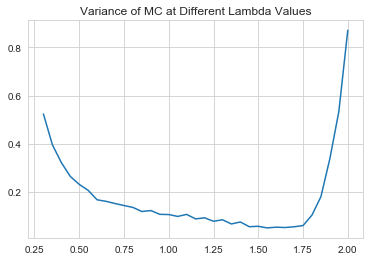

In [42]:
plt.plot(test_lamdas[5:40], variances[5:40])
plt.title("Variance of MC at Different Lambda Values");

The cell above are trying to find optimal variance; however, I do not the code is any relevance to the production. Will research more. 